In [2]:
from sklearn.datasets import make_moons
import numpy as np

X,y= make_moons(n_samples = 10000, noise = 0.4, random_state = 42)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    "max_leaf_nodes":list(range(2,100)),
    "min_samples_split": [2,5,10]
    
}

In [5]:
tree_clf = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(


    tree_clf,
    param_grid,
    cv=5,
    scoring = "accuracy",
    n_jobs=-1
    
)

grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [6]:
grid_search.best_params_

{'max_leaf_nodes': 23, 'min_samples_split': 2}

In [7]:
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,23
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
from sklearn.metrics import accuracy_score

y_pred = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.8735

In [16]:
import matplotlib.pyplot as plt

def plot_dec_boundary(model, X,y):

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() +0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() +0.5
    xx, yy = np.meshgrid(

        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )

    Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)

    plt.contour(xx,yy,Z,alpha = 0.3)
    plt.scatter(X[:0],X[:,1],c=y,s=5)
    plt.show()

ValueError: x and y must be the same size

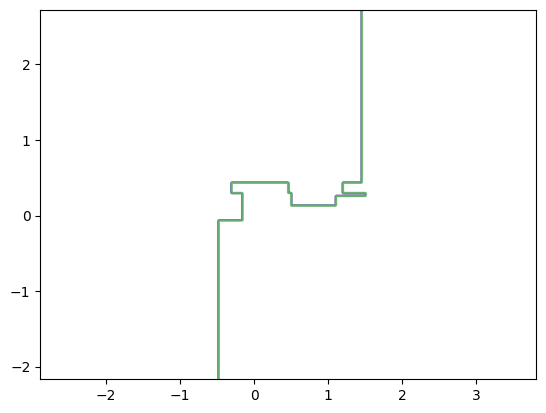

In [17]:
plot_dec_boundary(best_tree, X_train, y_train)